# User params

# Utility functions

In [1]:
import os
import pandas as pd

# Outlier detection with PyOD


In [3]:
# Load the data (the parquet file) into a dataframe
combined_df = pd.read_parquet(os.path.join('..', 'data', 'processed', 'combined_dataset_1000.parquet'))


In [6]:
from pyod.models.iforest import IForest

model = IForest(contamination=0.1, random_state=42)
model.fit(combined_df)
outliers = model.predict(combined_df)
outlier_scores = model.decision_function(combined_df)

Outlier scores stats:
count    1000.000000
mean       -0.024783
std         0.019326
min        -0.071393
25%        -0.038338
50%        -0.024697
75%        -0.012506
max         0.038008
dtype: float64


c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


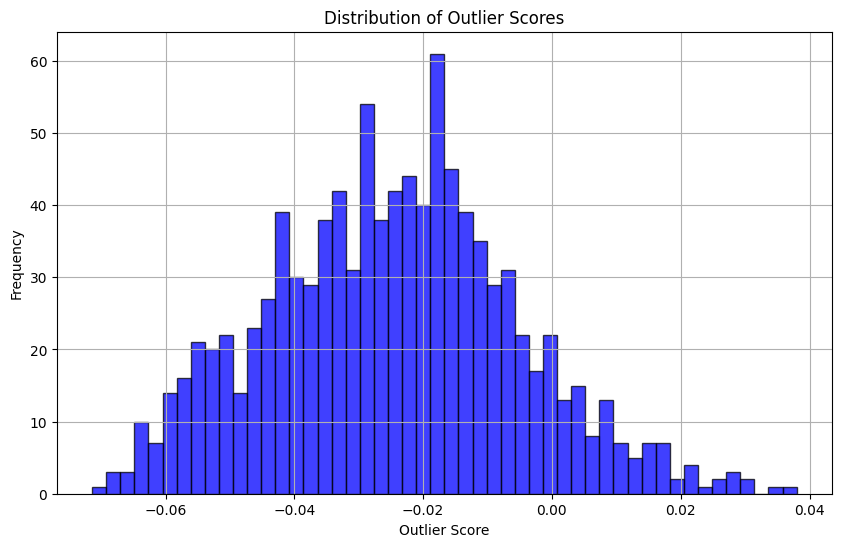

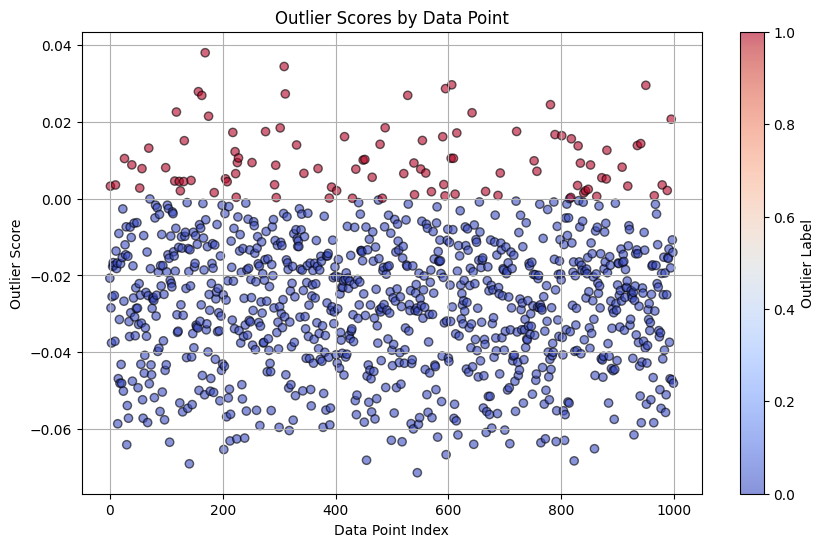

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the histogram of outlier scores
plt.figure(figsize=(10, 6))
plt.hist(outlier_scores, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Outlier Scores')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of outlier scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(outlier_scores)), outlier_scores, c=outliers, cmap='coolwarm', alpha=0.6, edgecolor='black')
plt.title('Outlier Scores by Data Point')
plt.xlabel('Data Point Index')
plt.ylabel('Outlier Score')
plt.grid(True)
plt.colorbar(label='Outlier Label')
plt.show()